In [1]:
import pickle as pkl
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from scipy.linalg import expm, sinm, cosm
from main import *

Stop


In [2]:
services = get_ph()
moms_ser = np.array(compute_first_n_moments(services[0], services[1], 10)).flatten()

arrivals = get_ph()
rate = np.random.uniform(0.5, 1)
arrivals_norm = arrivals[3]/rate

A = arrivals[1]*rate
a = arrivals[0]
moms_arrive = np.array(compute_first_n_moments(a, A, 10)).flatten()


sim_time = 700
lamda = rate
mu = 1.0
num_stations = 2

rate = 0.5
arrivals_norm = np.random.exponential(1/rate, 500000)
services_exp = np.random.exponential(1, 500000)

n_Queue_single_station = N_Queue_single_station(lamda, mu, sim_time, num_stations, services_exp, arrivals_norm)
n_Queue_single_station.run()

input_ = np.concatenate((moms_arrive, moms_ser), axis=0)
output = n_Queue_single_station.get_steady_single_station()

print('Stop')

Stop


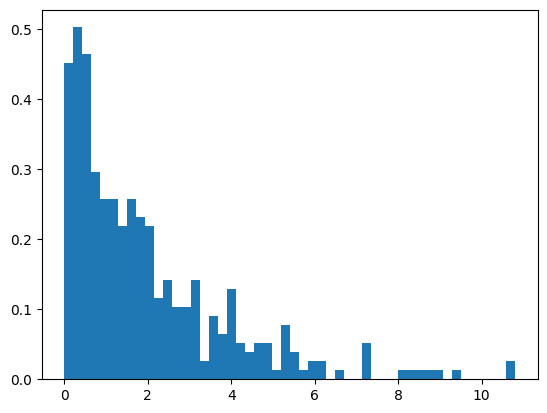

In [3]:
plt.figure()
plt.hist(n_Queue_single_station.inter_departures[1], bins = 50, density = True)
plt.show()

In [8]:
x = n_Queue_single_station.inter_departures[1][:-1]
y = n_Queue_single_station.inter_departures[1][1:]
r = np.corrcoef(x, y)
r

array([[ 1.        , -0.01055483],
       [-0.01055483,  1.        ]])

In [13]:
for ind in range(1,6):
    print((np.array(x)**ind).mean())
    print((arrivals_norm**ind).mean())

1.9522302943355203
1.9961876224165092
7.551261073997304
7.98655372946433
42.02424181001987
48.04868157486949
291.3071263184094
386.04474102354186
2315.5052509436323
3869.7665986840566


In [9]:
x[:5], y[:5]

([0.9186033199729547,
  3.648409982654594,
  0.4682980673449686,
  2.6540486818918385,
  3.1011841513448486],
 [3.648409982654594,
  0.4682980673449686,
  2.6540486818918385,
  3.1011841513448486,
  1.4923051637199425])

In [4]:
n_Queue_single_station.inter_departures[0]

[0.828530515381736,
 3.2767261944240724,
 0.800387941184928,
 2.545808281790907,
 1.1936482990689932,
 0.4920161787560424,
 3.7073751776724926,
 3.1188135183474888,
 0.1816211818167872,
 1.8047538301145387,
 0.4880001791425137,
 1.2758838478590206,
 1.0135565412287555,
 3.3531568923952655,
 0.31371169327368165,
 0.058836428349138714,
 1.1816554713750236,
 0.03788679205398893,
 1.2137331503551927,
 1.9875361124190754,
 3.095593232027028,
 0.1565690295493667,
 5.049994749887894,
 7.273914850173618,
 0.8849921432261709,
 1.5899476404130652,
 0.13065608574896714,
 0.4010447653247624,
 0.9083421301271457,
 0.2324933298174301,
 0.9030394364054999,
 1.1970397640261154,
 4.956386806279568,
 2.674852181202546,
 0.887968934200984,
 3.5044071100920036,
 4.662852208458723,
 0.7850583127152504,
 2.356938371500746,
 1.7536278321783243,
 4.331746145030394,
 1.0584717210374635,
 2.6368847655899117,
 1.7459031802102345,
 2.501018972516121,
 0.7973835124506081,
 5.698726088573764,
 2.136904291936659,
 1

In [ ]:
n_Queue_single_station.df_events[1].head()

In [5]:
df = n_Queue_single_station.df_events[0]

In [6]:
df.loc[df['Event']=='Departure', :]

,Event,Time,Customer,Queue lenght,System lenght,station
2,Departure,1.896548,1,0,0,0
5,Departure,4.942181,2,0,0,0
8,Departure,9.468138,3,0,0,0
11,Departure,10.885805,4,0,0,0
14,Departure,13.846164,5,0,0,0
...,...,...,...,...,...,...
1061,Departure,688.750076,354,0,0,0
1064,Departure,692.957447,355,0,0,0
1068,Departure,694.363262,356,1,1,0
1070,Departure,695.214364,357,0,0,0
